# SRL for MAB

## First Example

In this notebook, we present a first example of the use of *SMPyBandits* and *MABSim* as the base library for MAB implementartion.

In [5]:
from srl.mab import arms, policies, simulator

#Dependencies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

#Arms
from arms import BernoulliArm

#Policies
#from SMPyBandits.Policies import UCBalpha, UCB, IndexPolicy
from policies import UCBPolicy, EpsilonGreedyPolicy

#Simulation
from simulator import SMAB

0 -0.4
1 -0.19999999999999996
2 -0.19999999999999996
3 -0.19999999999999996
4 -0.19999999999999996
5 -0.19999999999999996
6 -0.09999999999999998
7 0.10000000000000009
8 0.19999999999999996


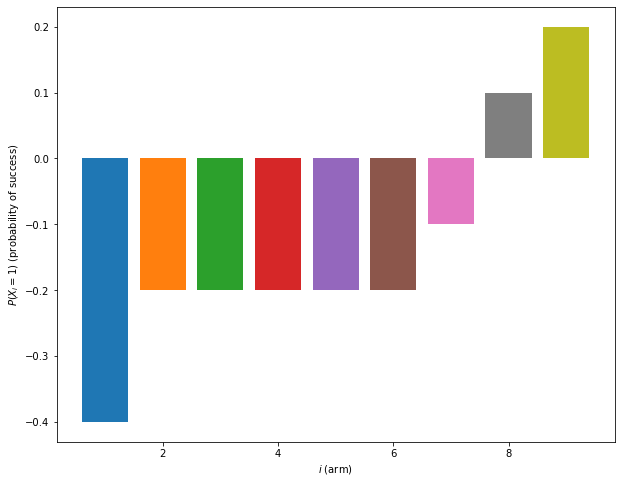

In [6]:
#GAUSSIAN ARMS
#k = 10
#mean_arr = np.linspace(-0.3, 0.3, k)
#stddev_arr = np.linspace(1.0, 2.0, k)
#arms = [GaussianArm(mean, stddev) for mean, stddev in zip(mean_arr, stddev_arr)]

#SHOW ARMS
#x = np.linspace(-5, +5, 500)
#for i, arm in enumerate(arms):
#    plt.plot(x, norm.pdf(x, arm.mean, arm.stddev))
#plt.xlabel('$R$ (reward)')
#plt.ylabel('$f$ (probability density function)')
#plt.show()

#BERNOULLI ARMS
means = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.45, 0.55, 0.6])
#means = np.concatenate((np.repeat(0.1, 15), np.repeat(0.7, 5), [0.9]))
k = len(means)
maxr = +1.0
minr = -1.0
ampl = maxr - minr
#arms objects
arms = [BernoulliArm(m, maxr=maxr, minr=minr) for m in means]
#arms = [BernoulliArm(m) for m in means]

#SHOW ARMS
for i, arm in enumerate(arms):
    print(i, arm.mean)
    plt.bar(i+1, arm.mean)
plt.xlabel('$i$ (arm)')
plt.ylabel('$P(X_i = 1)$ (probability of success)')
plt.show()


#initial budget
b_0 = k

#each arm must be tried at least w times at beginning
w=1



In [7]:
plt.rcParams['figure.figsize'] = (12, 8)


#algorithm
algs = [UCBPolicy(k, alpha=1.0*ampl),  #alpha is related to the amplitude of rewards
        EpsilonGreedyPolicy(k, epsilon=0.1)]

#time-horizon
h = 5000

#repetitions
n = 15

#window average parameter
#win = tau//10

M = SMAB(arms=arms, algs=algs, h=h, b_0=10, n=n, w=1, run=False, prev_draw=True, use_multiprocess=True, save_only_means=False)
M.run(tqdm_leave=True)

  0%|          | 0/15 [00:00<?, ?it/s]

In [8]:
#%matplotlib widget
import ipywidgets as widgets

#output = widgets.Output()
#link = widgets.link((sl1, 'value'), (sl2, 'value'))

@widgets.interact(i={**{'Repetition_'+str(i+1) : i for i in range(M.n)}, **{'Average':None}}, j={str(alg).format() : j for j, alg in enumerate(M.algs)})
def update1(i=0, j=0):
    #"""Remove old lines from plot and plot new one"""
    #[l.remove() for l in plt.gca().lines]
    M.plot_history(i=i, j=j)

@widgets.interact(i={**{'Repetition_'+str(i+1) : i for i in range(M.n)}, **{'Average':None}}, j={str(alg).format() : j for j, alg in enumerate(M.algs)})
def update2(i=0, j=0):
    M.plot_action_count_progression(i=i, j=j)

@widgets.interact(i={**{'Repetition_'+str(i+1) : i for i in range(M.n)}, **{'Average':None}}, j={str(alg).format() : j for j, alg in enumerate(M.algs)})
def update3(i=0, j=0):
    M.plot_action_freq_progression(i=i, j=j)

@widgets.interact(i={**{'Repetition_'+str(i+1) : i for i in range(M.n)}, **{'Average':None}}, j={str(alg).format() : j for j, alg in enumerate(M.algs)})
def update4(i=0, j=0):
    M.plot_reward_regret(i=i, j=j)

@widgets.interact(i={**{'Repetition_'+str(i+1) : i for i in range(M.n)}, **{'Average':None}}, j={str(alg).format() : j for j, alg in enumerate(M.algs)})
def update5(i=0, j=0):
    M.plot_comp_freq_prop(i=i, j=j)

interactive(children=(Dropdown(description='i', options={'Repetition_1': 0, 'Repetition_2': 1, 'Repetition_3':…

interactive(children=(Dropdown(description='i', options={'Repetition_1': 0, 'Repetition_2': 1, 'Repetition_3':…

interactive(children=(Dropdown(description='i', options={'Repetition_1': 0, 'Repetition_2': 1, 'Repetition_3':…

interactive(children=(Dropdown(description='i', options={'Repetition_1': 0, 'Repetition_2': 1, 'Repetition_3':…

interactive(children=(Dropdown(description='i', options={'Repetition_1': 0, 'Repetition_2': 1, 'Repetition_3':…

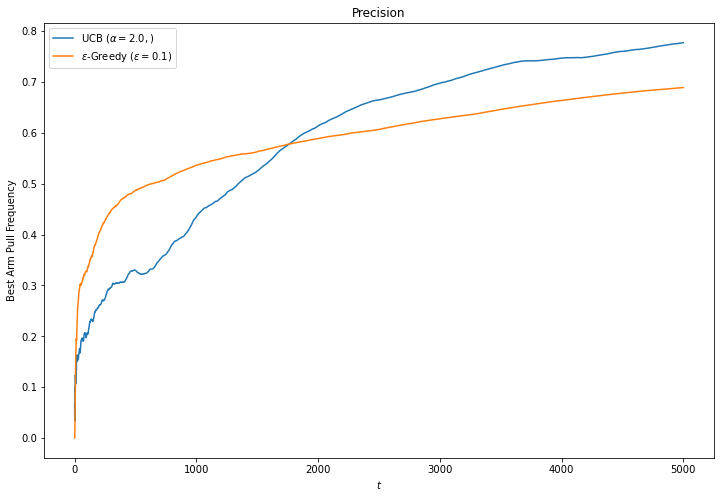

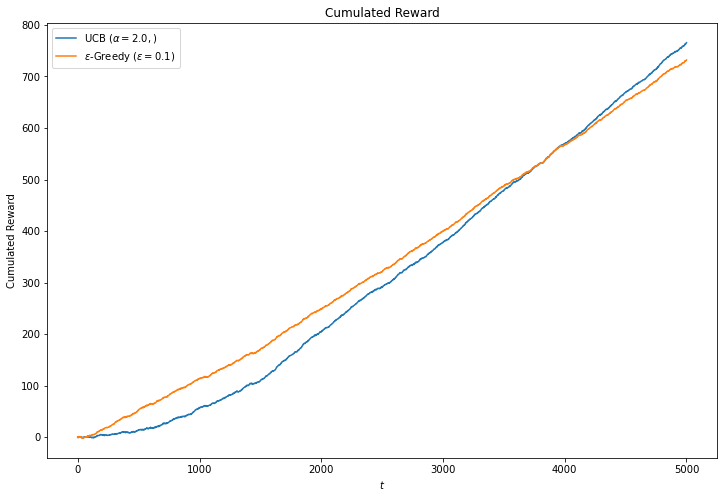

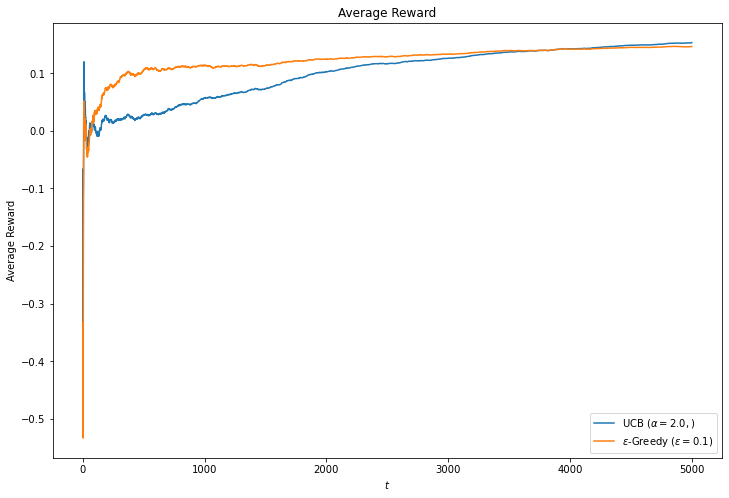

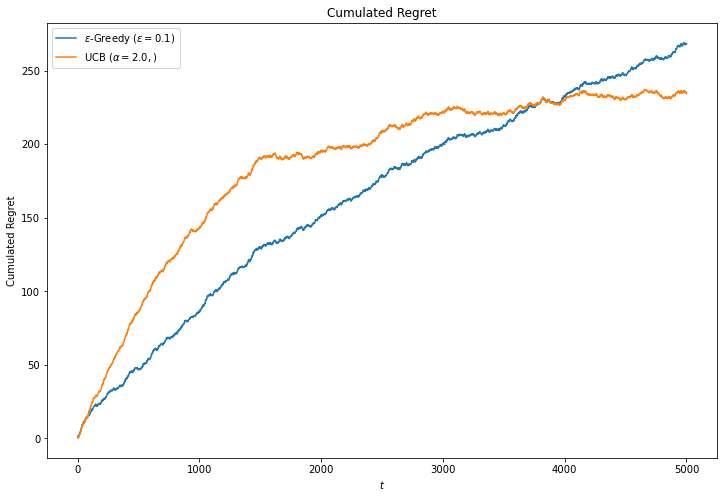

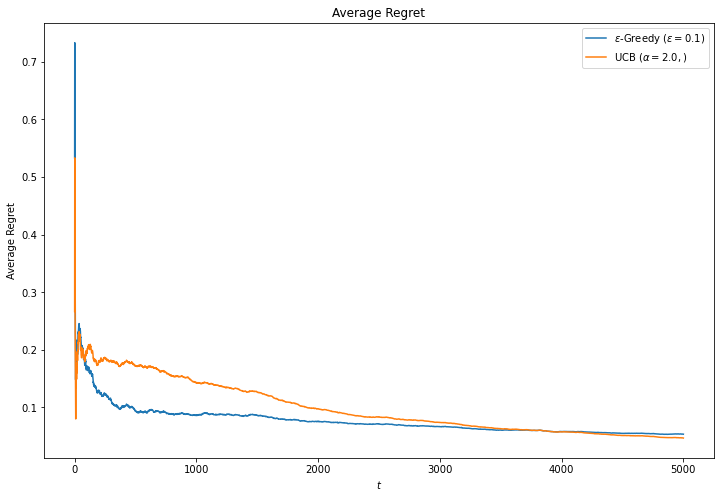

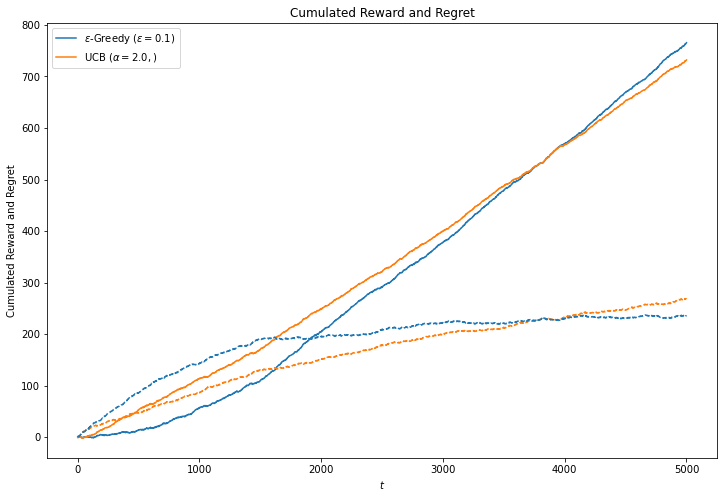

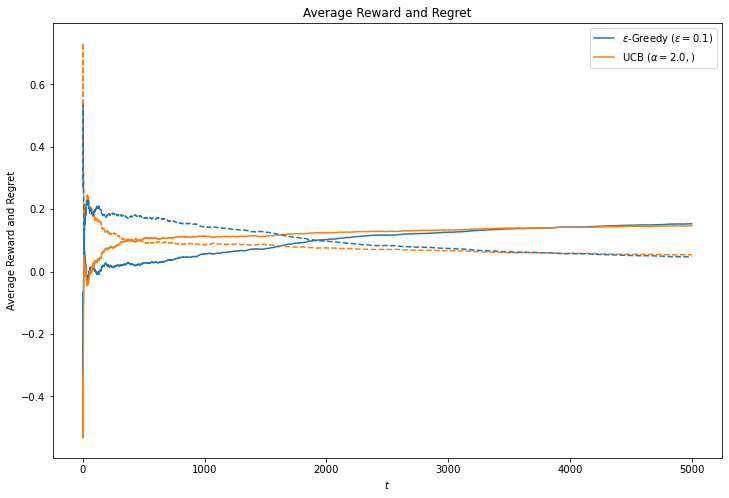

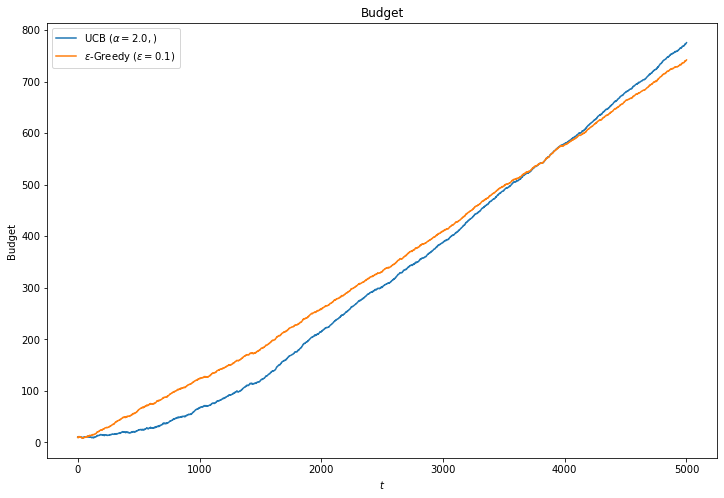

In [9]:
#M.plot_action_window_freq_spectrum()

M.plot_precision_progression()

M.plot_cumulated_reward_progression()
M.plot_average_reward_progression()
M.plot_cumulated_regret_progression()
M.plot_average_regret_progression()

#M.plot_comp_arm_count()
#M.plot_comp_arm_rewards()

M.plot_cumulated_reward_regret_progression()
M.plot_average_reward_regret_progression()

M.plot_budget_progression()
#M.plot_negative_budget_progression()
#M.plot_negative_budget_time_progression()
#M.plot_cumulated_negative_budget_progression()

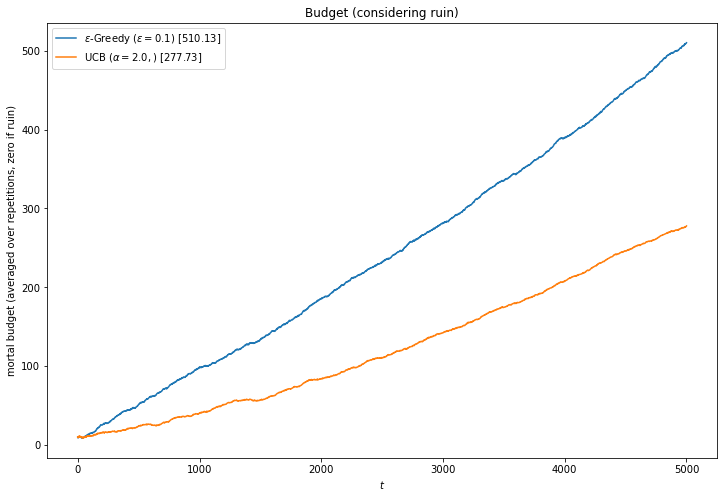

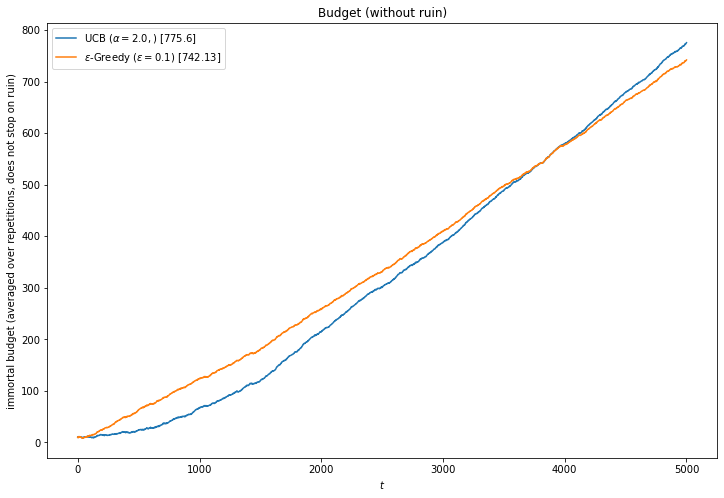

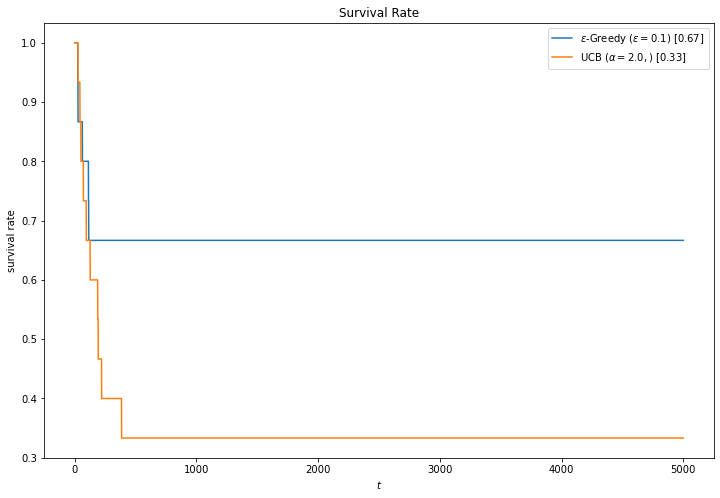

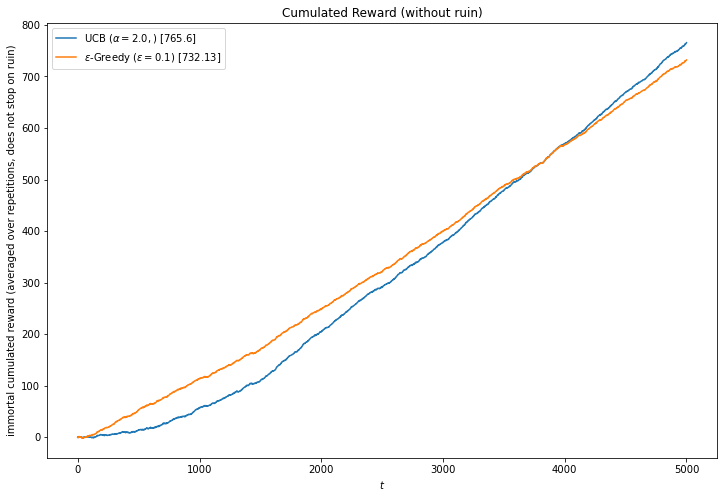

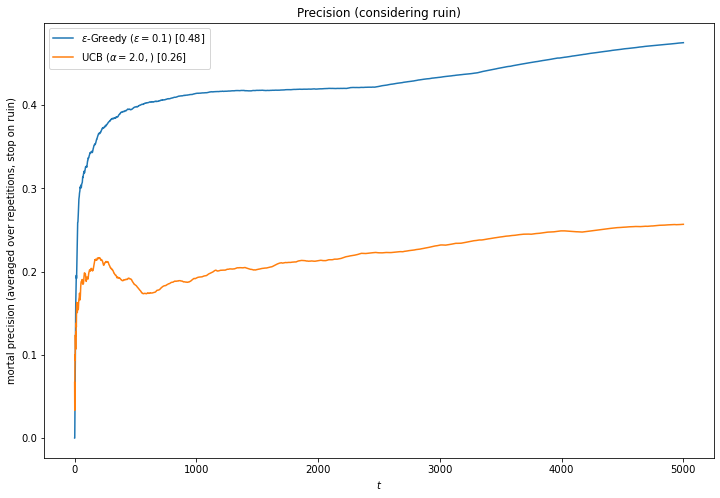

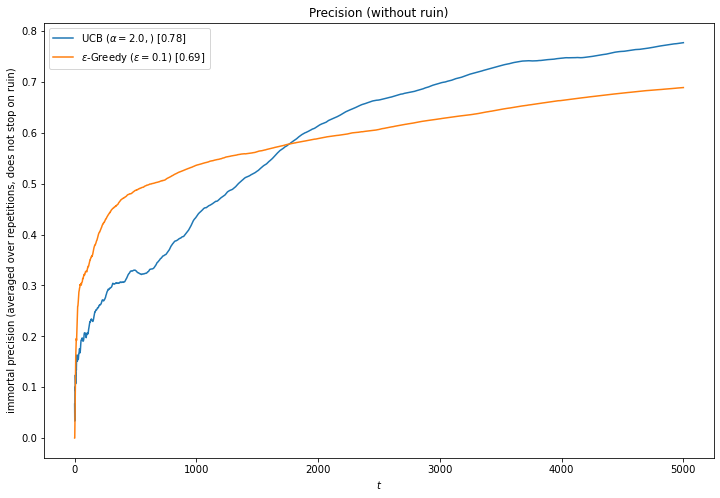

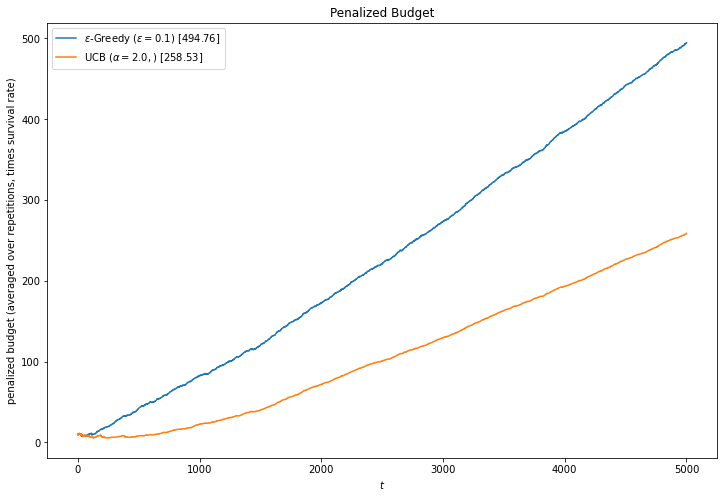

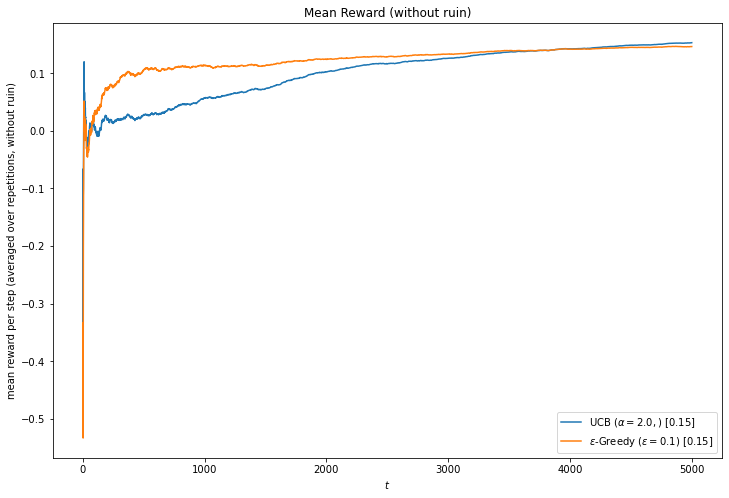

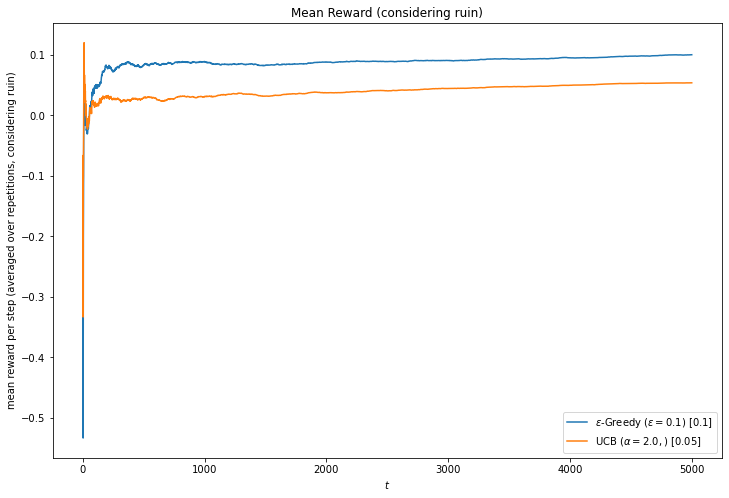

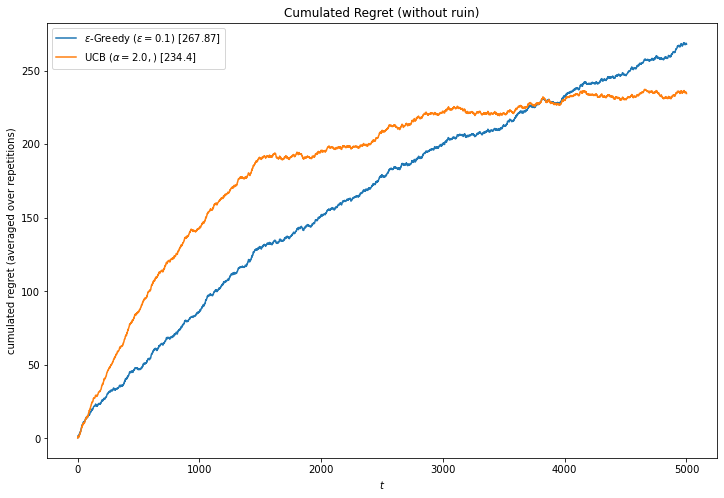

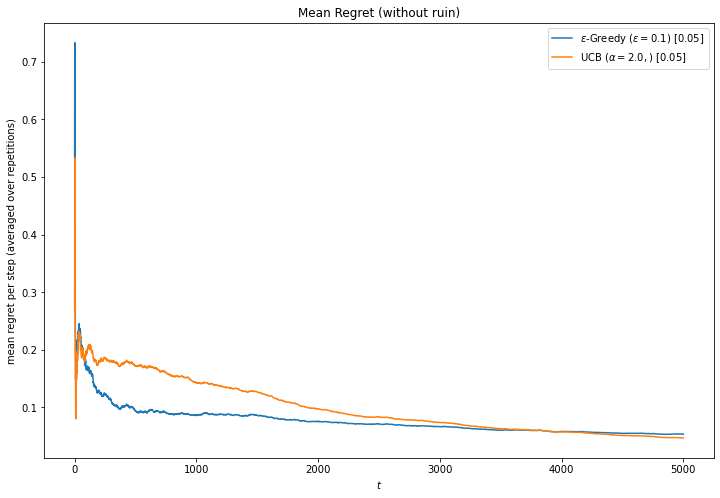

In [10]:
M.plot('mortal_budget')
M.plot('immortal_budget')
M.plot('survival')
M.plot('sum_reward')
M.plot('mortal_precision')
M.plot('immortal_precision')
M.plot('penalized_budget')
M.plot('avg_reward')
M.plot('avg_mortal_reward')
M.plot('sum_regret')
M.plot('avg_regret')